<a href="https://colab.research.google.com/github/NourhanDeifSayed/Predicting-Bankruptcy/blob/main/Nourhan_Deif_202201959_SVM_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import shap
from sklearn.model_selection import validation_curve

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
print(df.shape)

(6819, 96)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
print(df.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

In [ ]:
print(df['Bankrupt?'].value_counts(normalize=True))

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [ ]:
num_features = X.shape[1]
print("Number of features:", num_features)

Number of features: 95


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **SVM model Classifier**

Best model in academic paper https://www.mdpi.com/1911-8074/15/1/35

In [ ]:
svc = SVC(kernel='linear')

In [ ]:
model = SVC(class_weight='balanced', kernel='rbf', probability=True)
model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1171  142]
 [  16   35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.20      0.69      0.31        51

    accuracy                           0.88      1364
   macro avg       0.59      0.79      0.62      1364
weighted avg       0.96      0.88      0.91      1364



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.42%


# **Learning Curve**



*  A learning curve shows how well a model is learning over time.


*   The x-axis shows the number of training samples.

*    The y-axis shows the model’s accuracy.




*   Two lines are shown: one for training performance and one for validation performance.

*  If the validation line stays low, it may mean underfitting.
*    If the gap between training and validation is big, it may mean overfitting.


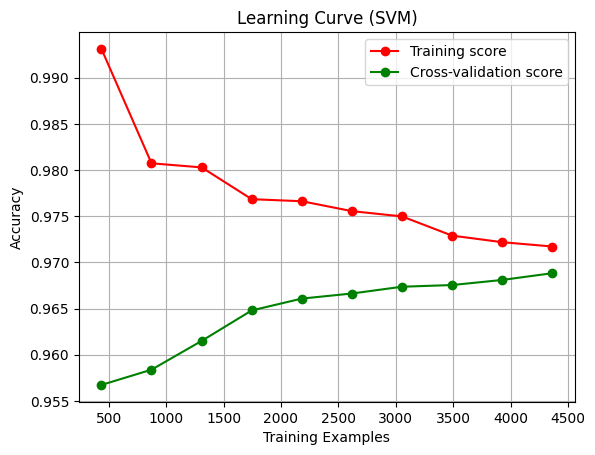

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    svc, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (SVM)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
param_range = np.logspace(-6, 3, 10)
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="C", param_range=param_range, cv=3, scoring="accuracy"
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

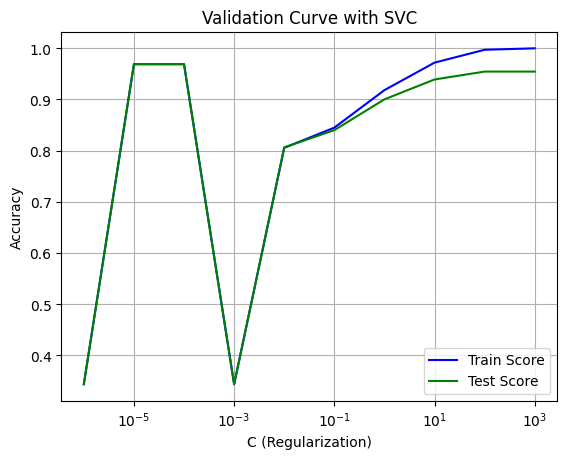

In [ ]:
plt.semilogx(param_range, np.mean(train_scores, axis=1), label="Train Score", color="blue")
plt.semilogx(param_range, np.mean(test_scores, axis=1), label="Test Score", color="green")
plt.title("Validation Curve with SVC")
plt.xlabel("C (Regularization)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Confusion matrix**


*   confusion matrix is used to compare the predicted label with true label



1.   TP : 1171 --> Model correctly predict the positive class
2.   TN: 35 --> Model correctly predict the negative class
3.   FP: 16 --> wrongly predict the positive class
4.   FN: 142 --> wrongly predict the negative class





In [ ]:
from sklearn.metrics import confusion_matrix
class_names = sorted(list(set(y_test)))

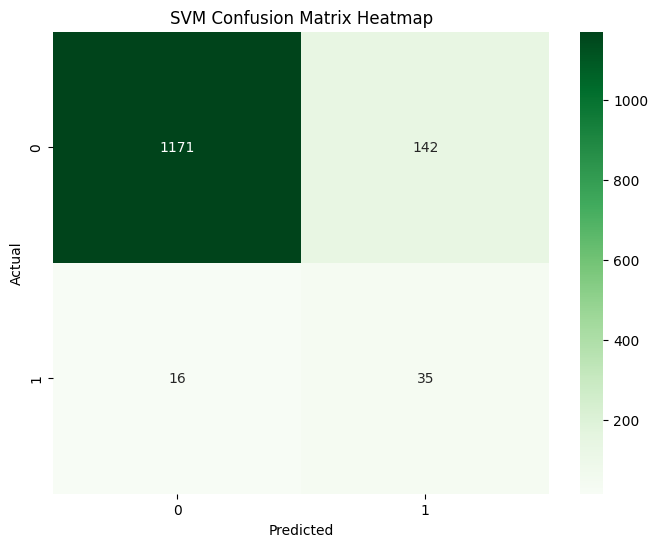

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix Heatmap')
plt.show()

**ROC Curve**




*  The ROC curve is a graph that shows how well classification model can separate between classes.
*  It plots True Positive Rate (TPR) vs. False Positive Rate (FPR).


*   The Area Under the Curve (AUC) tells how good the model is:


*    AUC = 1 : The model is good at telling the differce between positive and negative cases.
*    AUC = 0.5 : The model isn't learning anything useful and is just guessing randomly.
*   AUC < 0.5 : The model struggle to tell difference between positive and negative class

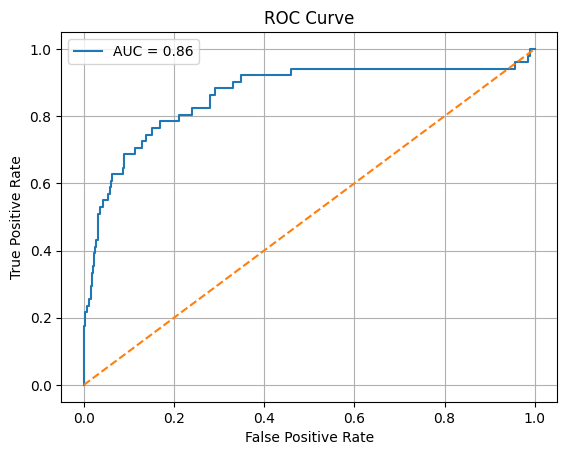

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_proba = svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

AUC cloase to 1: The model is good at telling the differce between positive and negative cases.

**RFE (Recursive Feature Elimination)**



*   RFE is a feature selection technique. It helps us choose the most important features from dataset.

*  How it work:


1.   It starts with all features.
2.   It trains a model
3.   Then it removes the least important feature.
4.    It repeats this process recursively until the desired number of features is left.

In [ ]:
selector = RFE(estimator=svc, n_features_to_select=30)
selector = selector.fit(X_train, y_train)

In [ ]:
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index([' ROA(A) before interest and % after tax', ' Operating Profit Rate',
       ' Pre-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Net Worth Turnover Rate (times)',
       ' Revenue per person', ' Allocation rate per person',
       ' Cash/Total Assets', ' Current Liabilities/Equity',
       ' Retained Earnings to Total Assets', ' Cash Flow to Sales',
       ' Current Liability to Equity', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' Cash F

**SVM After select the best 30 Features**

In [ ]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
final_model = SVC(kernel='rbf')
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9640762463343109
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.04      0.08        51

    accuracy                           0.96      1364
   macro avg       0.98      0.52      0.53      1364
weighted avg       0.97      0.96      0.95      1364



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9640762463343109


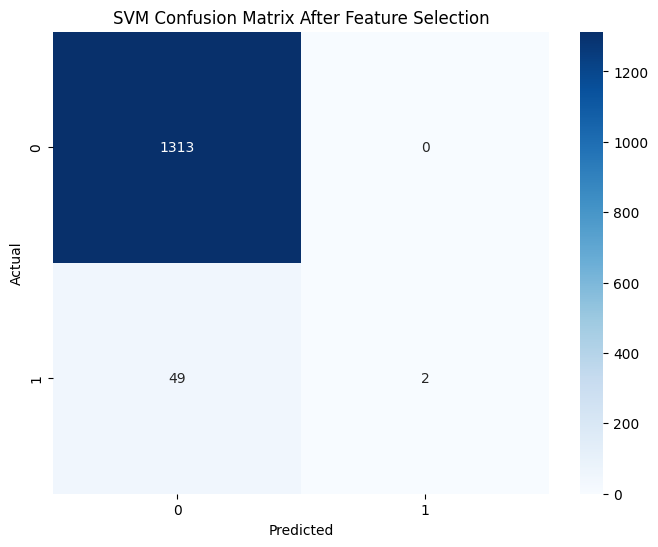

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix After Feature Selection')
plt.show()

**Permutation importance** tells us how much each feature important in model.



*    It works by randomly shuffling one feature at a time and checking how much the model's performance drops.
*    If the performance drops a lot, that feature is important.


*  If there's no change or improvement, that feature is not important.


In [ ]:
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

In [ ]:
feature_names = X.columns
importance_scores = pd.Series(results.importances_mean, index=feature_names)
sorted_importances = importance_scores.sort_values(ascending=False)
print("Feature Importances (sorted):")
print(sorted_importances)

Feature Importances (sorted):
Operating profit/Paid-in capital                           0.008724
Cash Turnover Rate                                         0.008651
Operating Profit Per Share (Yuan ¥)                        0.008211
Quick Assets/Total Assets                                  0.005865
Fixed Assets Turnover Frequency                            0.004179
                                                             ...   
Total Asset Turnover                                      -0.005792
Persistent EPS in the Last Four Seasons                   -0.006232
ROA(C) before interest and depreciation before interest   -0.007258
Net worth/Assets                                          -0.012537
Debt ratio %                                              -0.012537
Length: 95, dtype: float64


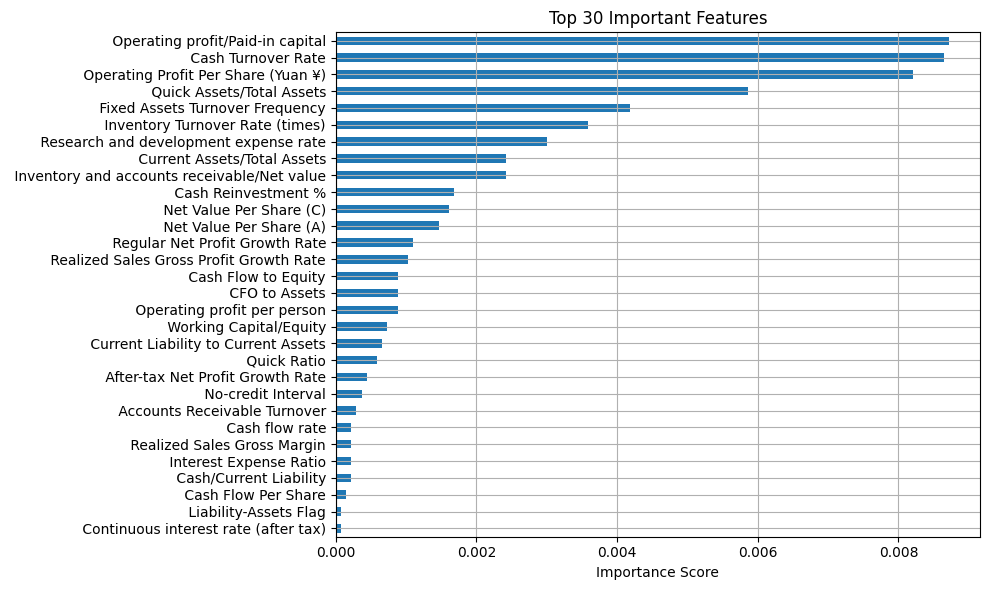

In [ ]:
top_features= 30
sorted_importances.head(top_features).plot(kind='barh', figsize=(10, 6), title=f"Top {top_features} Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# **SHAP**


*   SHAP
It works based on game theory:
Imagine features are like players in a game working together to make a prediction. SHAP tells us how much each feature contributed
How SHAP works:
Treat each feature value as a player
Prediction is the game's final output
Calculate how much the outcome changes with and without each feature, and this is called the Shapley value
Average these changes across all combinations to get the final importance




  0%|          | 0/50 [00:00<?, ?it/s]

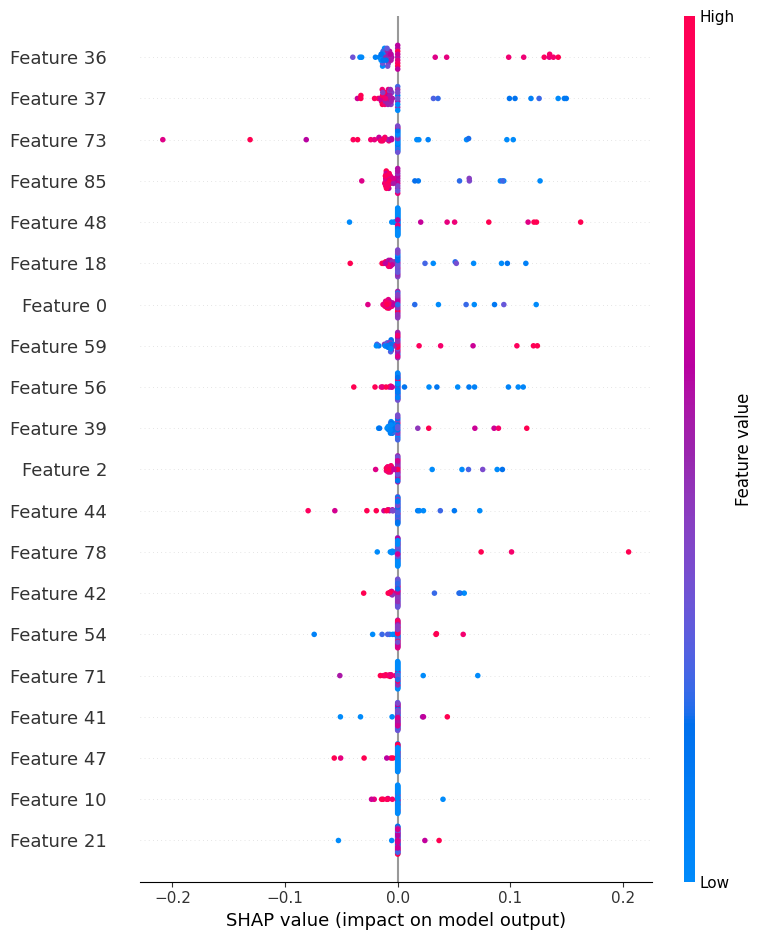

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:50])
shap.summary_plot(shap_values, X_test[:50])